In [4]:
#==================== Part 0: Basic Function ====================
import numpy as np
#用吴恩达课程的数据老是跑不对，theta相差很大，也找不出问题，换了一个sk自带的数据，又可以了。。。不知道问题出在哪
with open('F:\data\ex2data1.txt', 'r') as f:  
    data = f.readlines()  #txt中所有字符串读入data  
datamat = []
for line in data:  
    odom = line.strip().split(',')        #将单个数据分隔开存好  
    numbers_float = list(map(float, odom)) #转化为浮点数  
    datamat.append(numbers_float)
#print datamat
datanp = np.array(datamat)
print(datanp.shape)
x = datanp[:,(0,1)].reshape((100,2))  
y = datanp[:,2].reshape((100,1))
y = y.astype(np.int32) 

(100, 3)


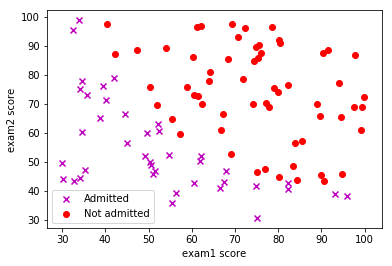

In [5]:
#%% ==================== Part 1: Plotting ====================
#We start the exercise by first plotting the data to understand the the problem we are working with.
import matplotlib.pyplot as plt

def plotData(x,y):
    fig = plt.figure()  
    ax= fig.add_subplot(111) #使画在一个图上
    
    pos = np.where(y[:,0]==0) #y为类似矩阵形式，所以要再取第一列
    neg = np.where(y[:,0]==1)
    ax1 = plt.scatter(x[pos,0], x[pos,1], marker = 'x', color = 'm')  
    ax2 = plt.scatter(x[neg,0], x[neg,1], marker = 'o', color = 'r')  
    plt.xlabel('exam1 score') 
    plt.ylabel('exam2 score')
    
    plt.legend([ax1, ax2], ['Admitted', 'Not admitted'])
    plt.show()

plotData(x,y)

In [7]:
import xgboost as xgb
# read in data
dtrain = xgb.DMatrix(x,y)
#dtest = 
#DMatrix is a internal data structure that used by XGBoost which is optimized for both memory efficiency and training speed.
#You can construct DMatrix from numpy.arrays

# specify parameters via map
param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic' }
#Booster params
#'max_depth':Maximum tree depth for base learners.
#'eta':Boosting learning rate
#'silent':Whether to print messages while running boosting.  Boolean
#'objective':Specify the learning task and the corresponding learning objective or a custom objective function to be used .
#         signature objective(y_true, y_pred) -> grad

num_round = 2  #Number of boosting iterations.
bst = xgb.train(param, dtrain, num_round)

In [13]:
preds = bst.predict(dtrain)
print(preds)

[ 0.08509674  0.06080159  0.08509674  0.94526684  0.94526684  0.06080159
  0.94526684  0.86125982  0.94526684  0.86125982  0.22697201  0.22697201
  0.94526684  0.94526684  0.08509674  0.82953429  0.86125982  0.58010274
  0.94526684  0.86125982  0.06133622  0.94526684  0.06080159  0.06080159
  0.94526684  0.94526684  0.86125982  0.22697201  0.58010274  0.08509674
  0.94526684  0.86125982  0.44729429  0.44729429  0.08509674  0.06080159
  0.35868177  0.94526684  0.22697201  0.08509674  0.86125982  0.06080159
  0.94526684  0.22697201  0.06080159  0.58010274  0.94526684  0.94526684
  0.94526684  0.94526684  0.94526684  0.94526684  0.86125982  0.06080159
  0.06080159  0.06080159  0.94526684  0.35868177  0.94526684  0.94526684
  0.94526684  0.06080159  0.06080159  0.06080159  0.44729429  0.06133622
  0.82953429  0.06080159  0.94526684  0.94526684  0.06080159  0.94526684
  0.94526684  0.94526684  0.94526684  0.94526684  0.82953429  0.44729429
  0.06133622  0.22697201  0.94526684  0.86125982  0

In [15]:
preds[preds>0.5] = 1
preds[preds<0.5] = 0
print(preds)

[ 0.  0.  0.  1.  1.  0.  1.  1.  1.  1.  0.  0.  1.  1.  0.  1.  1.  1.
  1.  1.  0.  1.  0.  0.  1.  1.  1.  0.  1.  0.  1.  1.  0.  0.  0.  0.
  0.  1.  0.  0.  1.  0.  1.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  0.
  0.  0.  1.  0.  1.  1.  1.  0.  0.  0.  0.  0.  1.  0.  1.  1.  0.  1.
  1.  1.  1.  1.  1.  0.  0.  0.  1.  1.  1.  1.  1.  1.  0.  1.  1.  0.
  1.  1.  0.  1.  1.  1.  1.  1.  0.  1.]


In [19]:
preds-y.T

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.]])

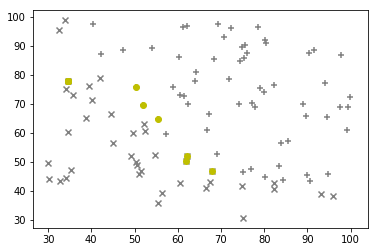

In [28]:
#看看误分类的点
def plotData(x,y_pre,y):
    fig = plt.figure()  
    ax= fig.add_subplot(111) #使画在一个图上
    
    pos = np.where(y[:,0]==0) #y为类似矩阵形式，所以要再取第一列
    neg = np.where(y[:,0]==1)
    ax1 = plt.scatter(x[pos,0], x[pos,1], marker = 'x', color = 'gray')  
    ax2 = plt.scatter(x[neg,0], x[neg,1], marker = '+', color = 'gray')  

    diff = np.where(y_pre!=y)
    ax3 = plt.scatter(x[diff,0], x[diff,1], marker = 'o', color = 'y')  
    
    plt.show()

plotData(x,preds.reshape((100,1)),y)